In [1]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# READ/OPEN THE DATA
file_path = '/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/expressiondata.csv'
df = pd.read_csv(file_path, index_col = 0)
df.head(5)

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,...,4c87674d-dd05-490d-a584-84490509f4d4.rna_seq.augmented_star_gene_counts.tsv,5cfb768f-7b49-4a72-92c9-d7502f5ba5b8.rna_seq.augmented_star_gene_counts.tsv,03ef99c7-55b7-4770-9eac-2ee007aa78ca.rna_seq.augmented_star_gene_counts.tsv,3ab1dfbc-ab83-446e-b680-cd6aec12b177.rna_seq.augmented_star_gene_counts.tsv,029a2c3e-0fd1-4cb4-9021-3947d28ca28d.rna_seq.augmented_star_gene_counts.tsv,ed41fe8b-fe2e-4bf3-91e3-2cf50ddcbc78.rna_seq.augmented_star_gene_counts.tsv,b9a5766c-e155-423e-a075-10fb14fe87df.rna_seq.augmented_star_gene_counts.tsv,a462c0f9-23d3-428b-9b61-e42cb6a68af1.rna_seq.augmented_star_gene_counts.tsv,0d3cfbc0-4420-48ed-a459-2e18d2ece5b6.rna_seq.augmented_star_gene_counts.tsv,d43517e2-e447-42cc-93e1-cbc9669ef4f1.rna_seq.augmented_star_gene_counts.tsv
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,56.8355,74.7327,57.7846,46.0126,12.4196,53.8879,96.3471,68.3735,33.3739,33.3062,...,31.1013,32.6715,52.2535,33.1116,45.6996,56.9952,51.5911,39.8503,44.8110,14.0432
TNMD,0.0000,0.1668,0.0000,0.0000,0.0775,0.0636,0.0000,0.0000,0.0000,1.5346,...,0.0000,0.0000,0.0246,0.0391,0.0461,0.0000,0.0000,0.0000,0.0000,0.0000
DPM1,87.9140,109.9944,134.5809,199.7075,60.5576,47.7809,108.2586,111.4444,46.9780,103.9621,...,72.4350,89.9746,113.8335,110.0302,69.3967,114.7565,99.2550,102.3000,185.0433,98.2518
SCYL3,8.8095,9.4624,11.6945,17.6547,3.4318,4.5405,17.7623,10.9897,5.4694,23.5618,...,6.9302,4.1626,9.1551,7.0918,4.5215,8.9580,5.6158,6.0453,4.9388,5.1934
C1orf112,5.8867,5.3551,4.7701,3.8401,1.2933,2.8140,15.3762,9.7393,2.2210,23.4849,...,12.3134,4.8411,9.4480,6.1057,2.2129,14.1934,4.6770,6.0986,8.3207,5.9877


In [3]:
# PREPARING THE DATA FOR GRAPHIC REPRESENTATION
log_df = np.log2(df + 1)
log_df.to_csv('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/log2expressiondata.csv')

In [4]:
sum_by_rows = log_df.sum(axis=1)
variance_by_rows = log_df.var(axis=1)

genes_exp = pd.DataFrame({
    'Sums': sum_by_rows,
    'Variance': variance_by_rows
})

genes_exp.index = log_df.index
print(genes_exp)

                    Sums  Variance
gene_name                         
TSPAN6       9994.332482  0.869606
TNMD          785.269361  0.461924
DPM1        12786.217326  0.511543
SCYL3        6624.810467  0.410240
C1orf112     5401.263293  0.633846
...                  ...       ...
AC008763.4     17.101303  0.003603
AL592295.6   6574.590402  0.504191
AC006486.3      0.000000  0.000000
AL391628.1    181.217101  0.005423
AP006621.6   1324.063064  0.146140

[60660 rows x 2 columns]


Lower     60590
Higher       70
Name: Threshold, dtype: int64


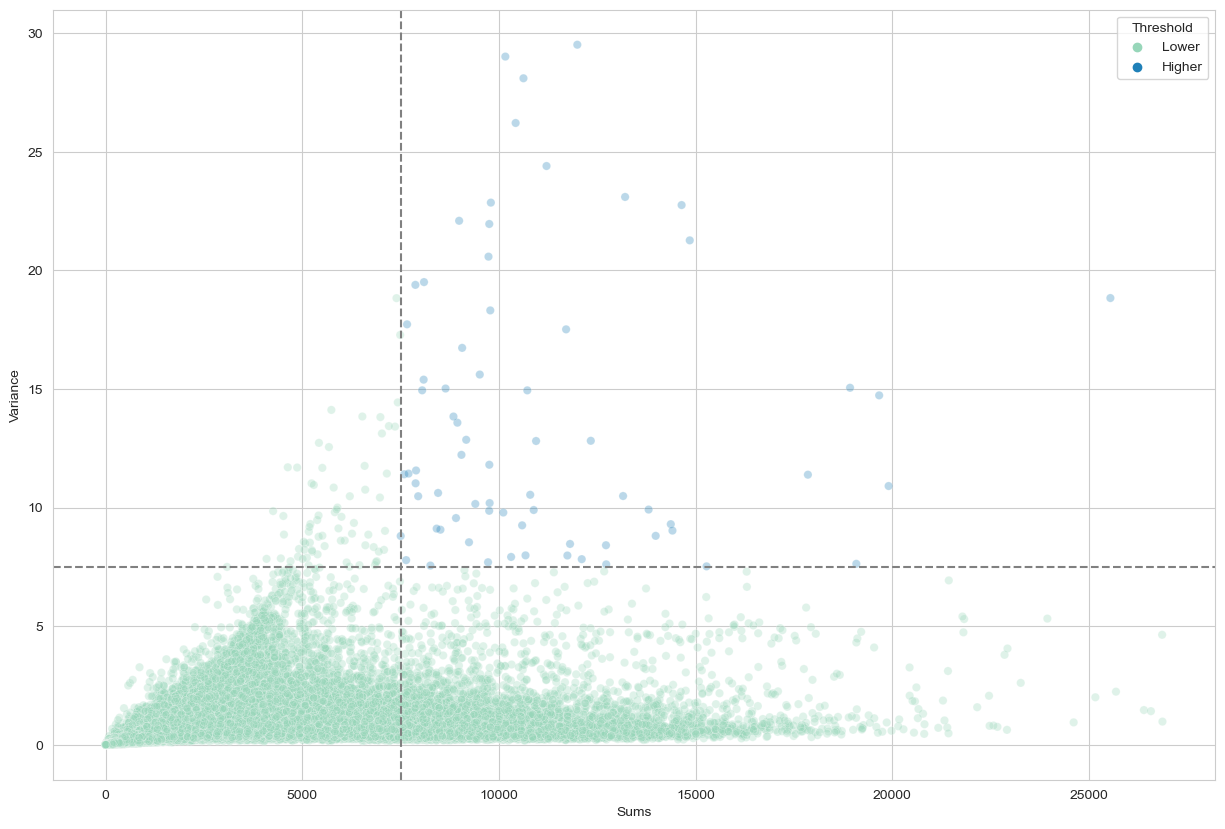

In [5]:
# SCATTERPLOT
# This scatterplot will help to identify how the genes are expressed and grab the ones we're intrested in
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

value = (genes_exp['Sums'] > 7500) & (genes_exp['Variance'] > 7.5)
genes_exp['Threshold']= np.where( value == True , 'Higher', 'Lower')
sns.scatterplot(x = genes_exp['Sums'], y = genes_exp['Variance'], hue = genes_exp['Threshold'], palette = 'YlGnBu', alpha = .3)

plt.axhline(y = 7.5, color = 'grey', linestyle = '--')
plt.axvline(x = 7500, color = 'grey', linestyle = '--')

print(pd.Series(genes_exp['Threshold']).value_counts())

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/scatterplot.png')

In [6]:
# FILTER DE DATA TO HAVE REPRESENTATIVE SAMPLES FOR GRAPHIC REPRESENTATIONS
means_by_samples = log_df.mean()
samples_mean = means_by_samples.mean()
print (samples_mean)

rep_samples = (means_by_samples >= samples_mean - 0.01) & (means_by_samples <= samples_mean + 0.01)
print(pd.Series(rep_samples).value_counts())
#We apply a really restrictive filter as we don't want really large graphs 

subset = log_df.loc[:, rep_samples]
subset.head(5)

1.3379149035756759
False    1966
True       31
dtype: int64


,8215e3ed-ca48-4f0a-8dea-3a10bfef0900.rna_seq.augmented_star_gene_counts.tsv,2c933b04-5fb3-4500-8ee8-70fee015aa81.rna_seq.augmented_star_gene_counts.tsv,2b519912-61c7-4104-b5d4-7a26beb73fd7.rna_seq.augmented_star_gene_counts.tsv,a776ce37-f507-49ac-b459-0653cfb60190.rna_seq.augmented_star_gene_counts.tsv,c2575d99-556e-4efb-9e14-4f387a043607.rna_seq.augmented_star_gene_counts.tsv,ada63890-c4ed-4c3c-a1fc-2c7c1c77aaf8.rna_seq.augmented_star_gene_counts.tsv,452aeaa2-575b-46aa-b8b3-07158cf2bf03.rna_seq.augmented_star_gene_counts.tsv,11302073-0f4b-4cc0-b7e0-3f588a5ddecb.rna_seq.augmented_star_gene_counts.tsv,67980247-ec2a-4804-b4d1-ed752c40577a.rna_seq.augmented_star_gene_counts.tsv,c3878bd6-8b79-422b-9512-0fe3a9df83e7.rna_seq.augmented_star_gene_counts.tsv,...,fb870a60-4b6d-4e83-b366-bdaaca72f205.rna_seq.augmented_star_gene_counts.tsv,8536c3c1-1e75-4ebc-b792-30d7d228a117.rna_seq.augmented_star_gene_counts.tsv,a571bba6-c41c-487b-a13d-a10ebbdf2b92.rna_seq.augmented_star_gene_counts.tsv,7635bae0-a49b-4c58-ae88-de85f60b4ab6.rna_seq.augmented_star_gene_counts.tsv,1ef9fac4-6f3d-43ba-b663-fbd2cc87f48f.rna_seq.augmented_star_gene_counts.tsv,2e90137c-306a-4aee-b772-18827857d2e1.rna_seq.augmented_star_gene_counts.tsv,2d5147ef-d38d-4341-a8da-6c0fa8482cd3.rna_seq.augmented_star_gene_counts.tsv,5e00d446-846f-4be1-a799-fcfe1ba82c46.rna_seq.augmented_star_gene_counts.tsv,43a4d171-846d-49e9-9e61-ce57f83c8bea.rna_seq.augmented_star_gene_counts.tsv,f766816f-972b-4932-9a07-815b18a1d376.rna_seq.augmented_star_gene_counts.tsv
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,5.056987,4.420711,4.640390,5.274273,4.490840,3.454794,3.074249,5.248539,6.180194,5.556960,...,6.329312,5.482587,5.131343,4.420880,4.693704,5.542178,5.836909,5.068366,6.033617,5.457424
TNMD,0.812786,0.398241,0.385928,0.635987,0.731009,0.322736,0.176961,0.918081,0.217355,0.000000,...,0.215865,0.000000,0.209890,0.059217,0.504468,0.000000,0.000000,0.000000,0.070801,0.000000
DPM1,5.643614,5.931116,5.161980,5.768708,6.944185,5.615402,5.704869,5.935764,6.261847,7.712330,...,6.323084,7.171924,6.300860,5.451297,5.889155,6.602325,8.113630,6.672376,7.651168,7.684547
SCYL3,3.745463,3.625539,3.649409,3.155765,3.061586,3.542530,3.135650,3.995937,2.951662,3.467645,...,3.773638,3.440580,2.517603,3.461280,4.037057,2.952054,4.102751,2.810381,2.951756,3.474670
C1orf112,2.617040,2.315131,2.106281,3.072895,2.569199,2.775303,2.729357,2.502509,3.747248,4.153619,...,3.096532,3.755336,2.538613,2.092444,3.117346,2.867936,4.661185,2.139502,2.755721,3.811081


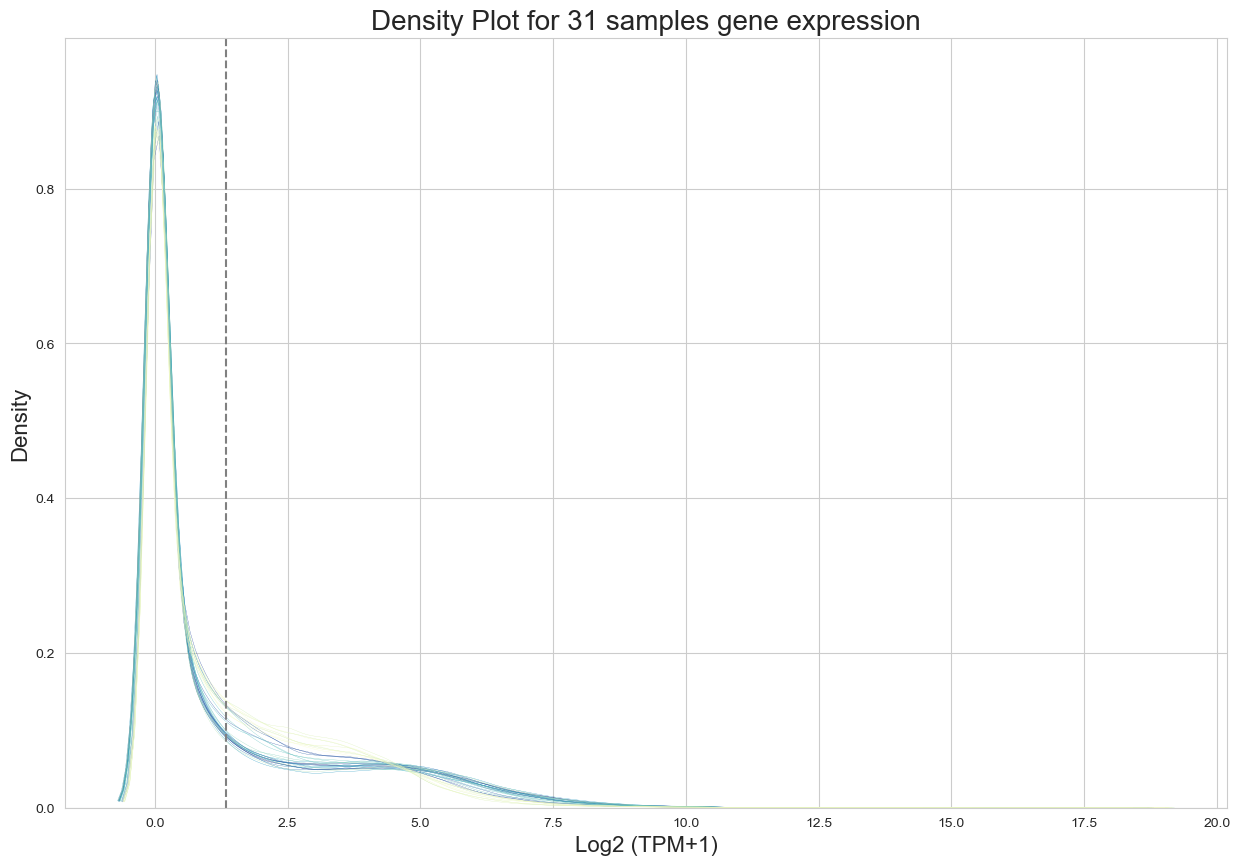

In [7]:
# DENSITY PLOT
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.kdeplot(data = subset, common_norm = False, legend = False, palette = 'YlGnBu', linewidth = .2)
plt.axvline(x = samples_mean, color = 'grey', linestyle = '--')

plt.title('Density Plot for 31 samples gene expression', fontsize = 20)
plt.xlabel('Log2 (TPM+1)', fontsize = 16)
plt.ylabel('Density', fontsize = 16)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/densityplot.png')

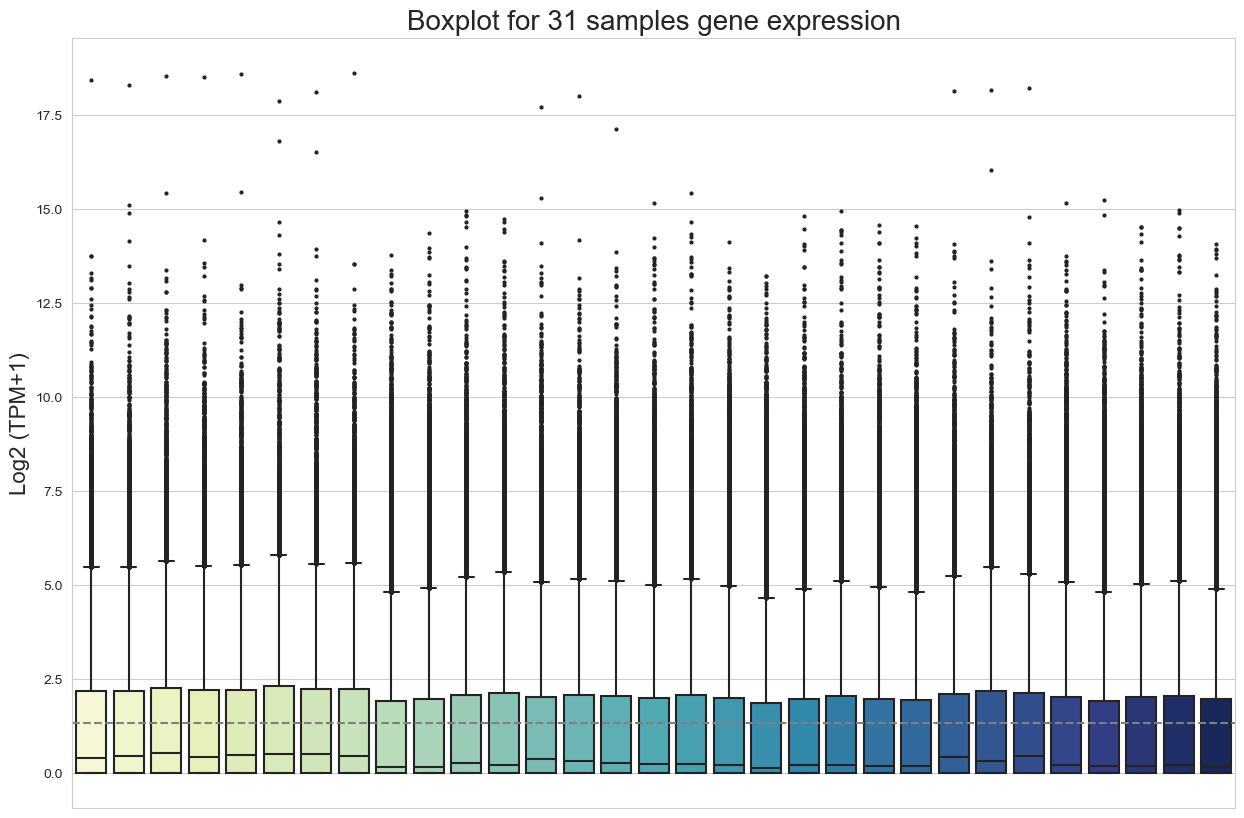

In [8]:
# BOXPLOT
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.boxplot(data = subset, palette = 'YlGnBu', flierprops = {'marker': 'o', 'markersize': 2})
plt.axhline(y = samples_mean, color = 'grey', linestyle = '--')
plt. xticks([])

plt.title('Boxplot for 31 samples gene expression', fontsize = 20)
plt.ylabel('Log2 (TPM+1)', fontsize = 16)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/boxplot.png')

In [9]:
# FILTER DE DATA TO GRAB THE MOST EXPRESSED GENES IN ALL THE SAMPLES FOR THE HEATMAP
hm_subset = subset[genes_exp['Threshold'] == 'Higher']
#Now we have a  70 x 31 subset of the data

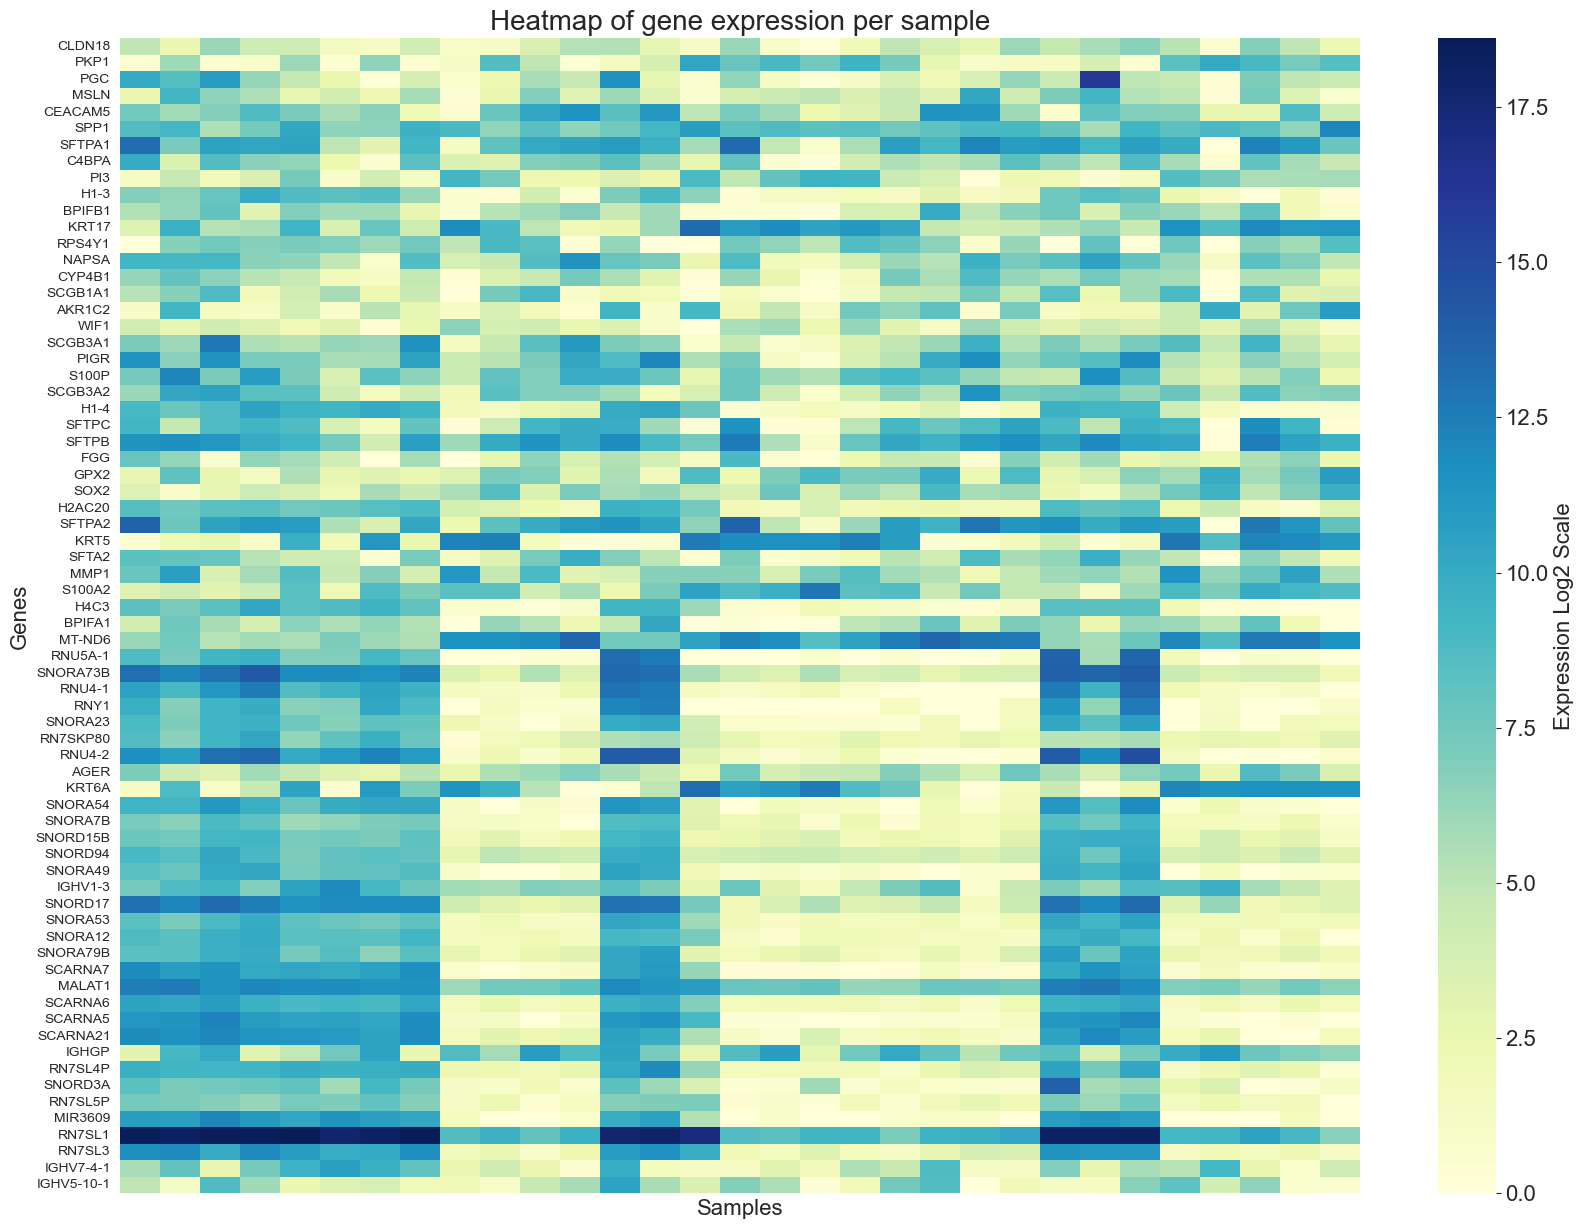

In [10]:
# HEATMAP
plt.figure(figsize=(20, 15))

heatmap = sns.heatmap(hm_subset, cmap='YlGnBu', xticklabels=False, cbar_kws={'label': 'Expression Log Scale'})

plt.title('Heatmap of gene expression per sample', fontsize = 20)
plt.xlabel('Samples', fontsize = 16)
plt.ylabel('Genes', fontsize = 16)

cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Expression Log2 Scale', fontsize=16)
cbar.ax.tick_params(labelsize=16)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/heatmap.png')